In [ ]:
# Siyi Qian 200012298709
# Chenting Zhang 200205146202

In [1]:
import numpy as np
import maze_result2_h as mz
import matplotlib.pyplot as plt

In [2]:
maze1 = np.array([
    [0, 0, 1, 0, 0, 0, 0, 2],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
])

maze2 = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])

gamma = 49/50
epsilon = 0.0001
simulate_time = 10000

29
4160
0.5840000000000001


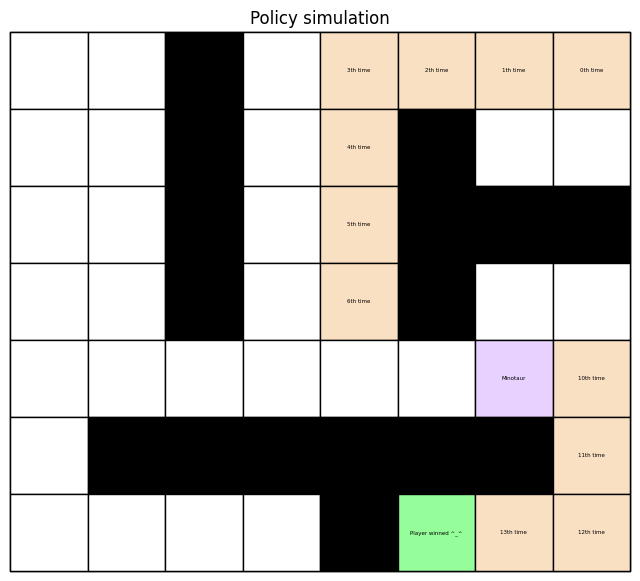

In [3]:
start1 = (0, 0, 6, 5)
fail_num = 0
env1 = mz.Maze(maze1, minotaur_stay=False)
# num_simulations = 10000
V1, policy1 = mz.value_iteration(env1, gamma=gamma, epsilon=epsilon)
env2 = mz.Maze(maze2, minotaur_stay=False)
V2, policy2 = mz.value_iteration(env2, gamma=gamma, epsilon=epsilon)
display_bool = True

# simulation loop
for _ in range(simulate_time):
    path1 = env1.simulate(start1, policy1, gamma=gamma, method='ValIter')
    # mz.animate_solution(maze1, path1)
    if path1[-1][:2] != (0, 7):
        # print('fail')
        fail_num += 1
        continue
    else:
        # print(path1[-1][2:])
        # print(len(path1))
        time1 = len(path1) - 1

        # after running first time: return 1. minotaur location(m_locx, m_locy)  2. time used
        m_locx, m_locy = path1[-1][2:]
        start2 = (0, 7, m_locx, m_locy)
        path2 = env2.simulate(start2, policy2, gamma=gamma, method='ValIter')
        # mz.animate_solution(maze2, path2)
        if path2[-1][:2] == (6, 5):
            # print('Win')
            time2 = len(path2) - 1
            total_time = time1 + time2
            if display_bool:
                mz.animate_solution(maze1, path1)
                mz.animate_solution(maze2, path2)
                display_bool = False
                print(total_time)
        else:
            fail_num += 1

print(fail_num)
print(1 - fail_num/simulate_time)
